# Clasificando generos de canciones usando datos de audio

Objetivo: Clasificar generos de canciones usando un data set de audios. Contamos con dos datasets en formato .CSV y formato .JSON

# 1. Preparando el dataset

In [24]:
import pandas as pd
import numpy as np
# Dataframes a usar:
# Metadatos de las canciones
df0 = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')
# Caracteristicas de las canciones
df1 = pd.read_json('datasets/echonest-metrics.json')

# Fusion de los dos datasets

df2 = pd.merge(df0[['track_id', 'genre_top']], df1, on='track_id')

In [22]:
df0.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [23]:
df1.columns

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [25]:
df2.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


El dataset de interes es el df2.

# 2. Reduccion dimensional

## a) Variables correlacionadas

Es util conocer si dos o mas pares de variables en el dataset (df2) estan correlacionadas, pues correlacion implica redundancia. Es util reducir la dimension del dataset, es decir la redundancia, porque tiene como beneficio optimizar el rendimiento computacional entre otros. Para ello usare una matriz dimensional como la siguiente:

In [30]:
matriz_de_correlacion = df2.corr()

In [33]:
matriz_de_correlacion.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,0.0100698
acousticness,-0.372282,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.0138406
danceability,0.0494541,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.0386027
instrumentalness,-0.275623,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.219967
liveness,0.0482307,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,-0.0450931
speechiness,-0.0269951,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,0.149894
tempo,-0.0253918,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,0.0522212
valence,0.0100698,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,1


Como se aprecia, no hay una correlacion significativa entre las caracateristicas del dataset que estamos analizando.

## b) Principal Component Analysis (PCA)

El principal component analysis es un algoritmo que permite eliminar informacion redundante en un dataset. Es decir, reducir la dimension de un data set.


Para poder aplicar este algoritmo es necesario en primer lugar Normalizar el dataset.

In [54]:
# Dataset de las caracteristicas de las canciones.

caracteristicas = df2.drop(['track_id', 'genre_top'], axis=1)

# Dataset de los generos de las canciones.
generos = df2[['genre_top']]

In [55]:
caracteristicas.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [56]:
generos.head()

,genre_top
0,Rock
1,Rock
2,Rock
3,Rock
4,Rock


In [59]:
# Normalizando el dataset caracteristicas

from sklearn.preprocessing import StandardScaler

normalizador = StandardScaler()
norm_caracteristicas = normalizador.fit_transform(caracteristicas)

In [60]:
norm_caracteristicas[:3]

array([[ 1.36170559, -0.98589622,  1.45332318,  0.97997488, -0.44275673,
        -0.36415677, -1.07200261, -1.57310227],
       [ 1.31234237, -0.45568108, -2.46398518,  0.93775699, -0.49643644,
        -0.49822414, -2.14506572, -1.5670495 ],
       [ 1.34364478, -1.60400213,  1.17609079,  0.96480214,  1.16583559,
        -0.11890299, -1.022854  , -1.57194929]])

In [64]:
# Principal Component Analysis (PCA). Explained variance ratio.
# Modulos y paquetes necesarios.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Instanciado pca
pca = PCA()
# Ajuste del algoritmo PCA al numpy array de interes. array de interes = norm_caracteristicas.
pca.fit(norm_caracteristicas)
# Obtencion de Explained variance ratio. Muestra que indice de las componentes principales contribuyen mas a la varianza de los datos.

exp_var_ratio = pca.explained_variance_ratio_

print(exp_var_ratio)

[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]


## c) Eleccion del numero de componentes principales que aportan la maxima varianza al dataset.

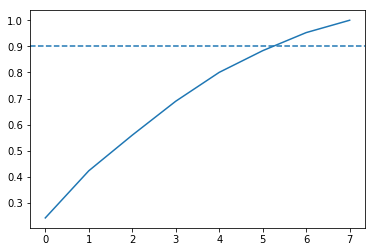

In [73]:
# Suma acumulada de la variable Explained variance ratio.
suma_exp_var_ratio = np.cumsum(exp_var_ratio)

# Grafico Numero del indice VS Explained variance ratio.
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(8), suma_exp_var_ratio)
ax.axhline(y=0.9, linestyle='--')

Es evidente pues, que para el indice sexto del array de suma acumulada de la Explained variance ratio se obtiene una varianza de los datos del 90%. Es decir, las 6 componentes principales de cada punto de los datos aportan el 90% de varianza.

## c) Aplicacion de la reduccion dimensional a los datos.

In [74]:
pca = PCA(6, random_state=10)
pca.fit(norm_caracteristicas)
proyeccion_pca = pca.transform(norm_caracteristicas)

In [76]:
proyeccion_pca

array([[-1.9858308 , -0.93847635,  0.25652779, -0.39291583, -0.0165219 ,
         2.01287947],
       [-0.59421084, -3.65365434,  0.68686515, -1.32336652, -0.52235007,
        -0.21797971],
       [-2.26200399, -0.57382843,  1.61915489, -0.58341885,  0.7023899 ,
         1.58668597],
       ...,
       [ 1.66908628,  1.84010121,  2.38294303, -2.12871589,  1.23664547,
        -0.63277253],
       [ 1.17001951,  2.03158181,  0.08689922,  0.88396123, -1.45765649,
        -0.03590123],
       [ 2.36368976,  1.15900708,  0.4473735 , -1.35198128, -0.03592518,
         0.82678557]])

Como era de esperar las componentes principales son 6

# 3. Clasificacion

Para clasificar los generos de las canciones voy a usar dos algoritmos de aprendizaje automatico, Arboles de decision y Regresion Logistica. Estos algoritmos van a ser aplicados a la variable proyeccion_pca.

In [134]:
# Particion de los datos.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(proyeccion_pca, generos, random_state=10)

# Arbol de decision.

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 10)

# Entrenamiento

tree.fit(X_train, y_train)

# Prediccion

prediccion_tree = tree.predict(X_test)



En el numpy array 'prediccion' obtengo la clasificacion de las canciones segun generos buscada.

In [314]:
print(prediccion_tree)

['Rock' 'Hip-Hop' 'Rock' ... 'Hip-Hop' 'Hip-Hop' 'Rock']


Ahora uso otro algoritmo de aprendizaje autonomo de clasificacion, 'Regresion Logistica'. Y me pregunto cual de los dos modelos es mejor.

In [128]:
# Warning
# Tras entrenar al algorirmo aparecera un warning para evitarlo:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)


In [ ]:
# Regresion Logistica
# Modulos
from sklearn.linear_model import LogisticRegression

# Instanciado del algoritmo
reg_log = LogisticRegression(random_state=10)

# Entrenamiento del modelo
reg_log.fit(X_train, y_train)

# Prediccion del modelo

prediccion_log = reg_log.predict(X_test)



In [126]:
print(prediccion_log)

['Rock' 'Rock' 'Rock' ... 'Rock' 'Hip-Hop' 'Rock']


In [267]:
# Creacion de un informe para cada algoritmo.

from sklearn.metrics import classification_report

informe_tree = classification_report(y_test, prediccion_tree)
informe_log = classification_report(y_test, prediccion_log)

In [144]:
print('Informe del algoritmo de decision tipo arbol:\n'  , informe_tree)
print('Informe del algoritmo de decision tipo regresion logistica: \n', informe_log)

Informe del algoritmo de decision tipo arbol:
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.63       229
        Rock       0.91      0.91      0.91       972

   micro avg       0.86      0.86      0.86      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.86      0.86      0.86      1201

Informe del algoritmo de decision tipo regresion logistica: 
               precision    recall  f1-score   support

     Hip-Hop       0.75      0.51      0.61       229
        Rock       0.89      0.96      0.93       972

   micro avg       0.87      0.87      0.87      1201
   macro avg       0.82      0.74      0.77      1201
weighted avg       0.87      0.87      0.86      1201



Mirando a los informes se aprecia que la precision de la prediccion de las canciones cuyo genero es Hip-Hop es menor en ambos algoritmos. Por que?

In [193]:
generos['genre_top'].value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

El dataset de entrenamiento con el que se entrena a ambos algoritmos muestra un numero importante menos de canciones del genero 'Hip-Hop'. Si los algoritmos entrenan menos, son menos precisos.

# 4. Precision

## a) Dataset equilibrado

Para igualar la precision del algoritmo para predecir tanto canciones de Rock como canciones Hip-Hop, voy a equilibrar el dataframe con el mismo numero de canciones de Rock y de Hip-Hop, es decir que el algoritmo entrene "igual" para los dos tipos de genero, sin que ninguno de ellos tenga ventaja.

In [217]:
# Obteniendo solo las canciones que pertenecen al genero Hip-Hop.
hiphop = df2.loc[df2['genre_top'] == 'Hip-Hop']
len(hiphop) 
# Obteniendo una muestra de dimension igual a la dimension de las canciones de genero hip-hop, aleatoria y cuyo genero es Rock. 
rock = df2.loc[df2['genre_top'] == 'Rock'].sample(len(hiphop), random_state = 10)


In [224]:
rock.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
742,4038,Rock,0.825838,0.263645,0.797948,0.842318,0.177089,0.045277,166.580,0.713586
1854,19501,Rock,0.966635,0.386114,0.651980,0.869472,0.353138,0.032208,130.767,0.712374
2288,31252,Rock,0.721510,0.358035,0.948187,0.801184,0.105706,0.095522,125.884,0.208728
1766,17947,Rock,0.617370,0.487321,0.918848,0.817050,0.089908,0.040337,129.565,0.268893
2141,27421,Rock,0.025464,0.245523,0.422381,0.938011,0.441009,0.038795,149.960,0.439876


In [225]:
hiphop.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
3892,2,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3893,3,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
3894,5,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3895,134,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
3896,583,Hip-Hop,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672


In [234]:
# Fusion de los dos dataframes, Rock y hiphop
DF = pd.concat([rock, hiphop])

Datos balanceados.

In [ ]:
# Datasets 
caracteristicas_DF = DF.drop(['track_id', 'genre_top'], axis=1)
generos_DF = DF[['genre_top']]

# Proyeccion PCA

proyeccion_pca_DF = pca.fit_transform(normalizador.fit_transform(caracteristicas_DF))

# Train_test_split

X_train_DF, X_test_DF, y_train_DF, y_test_DF = train_test_split(proyeccion_pca_DF, generos_DF, random_state = 10)

# Clasificacion:
## Arbol de decision
tree_DF = DecisionTreeClassifier(random_state = 10)
### Entrenamiento del algoritmo
tree_DF.fit(X_train_DF, y_train_DF)
### Prediccion

prediccion_tree_DF = tree_DF.predict(X_test_DF)

## Regresion Logistica

log_DF = LogisticRegression(random_state = 10)

### Entrenamiento del algoritmo.

log_DF.fit(X_train_DF, y_train_DF)

### Prediccion

prediccion_log_DF = log_DF.predict(X_test_DF)




In [286]:
# Comparacion de los modelos.

print('Arbol de decision \n', classification_report(y_test_DF, prediccion_tree_DF ))
print('Regresion Logistica \n', classification_report(y_test_DF, prediccion_log_DF ))

Arbol de decision 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

   micro avg       0.74      0.74      0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

Regresion Logistica 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

   micro avg       0.82      0.82      0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



Tras balancear los datos se obtiene una precision parecida.

## b) Cross-validation 

Dado que la division de datos en datos de entrenamiento y de prueba es aleatoria se obtienen diferentes valores para cada conjunto de datos divididos.
El algoritmo de Cross-validation divide a los datos multiples veces y prueba al modelo para cada division. Usare el metodo K-Fold.

In [ ]:
# Modulos
from sklearn.model_selection import KFold, cross_val_score

# Instanciando 
kf = KFold(n_splits = 10, random_state = 10)

# Clasificacion:

tree_cv = DecisionTreeClassifier(random_state=10)
reg_log_cv = LogisticRegression(random_state=10)

# Entrenamiento de los modelos.

tree_score = cross_val_score( tree_cv, proyeccion_pca_DF, generos_DF, cv = kf)
log_score = cross_val_score( reg_log_cv, proyeccion_pca_DF, generos_DF, cv= kf)

In [292]:
tree_score

array([0.6978022 , 0.72527473, 0.78021978, 0.70879121, 0.71428571,
       0.75274725, 0.76923077, 0.71978022, 0.78021978, 0.84065934])

In [293]:
log_score

array([0.76923077, 0.80769231, 0.82417582, 0.76923077, 0.76923077,
       0.78021978, 0.77472527, 0.74175824, 0.7967033 , 0.7967033 ])

In [308]:
print('Media de precision Arbol de decision', tree_score.mean())

Media precision Arbol de decision 0.7489010989010989


In [309]:
print('Media de precision de Regresion logistica', log_score.mean())

Media de precision de Regresion logistica 0.782967032967033
